In [1]:
# Imports needed to complete this exam

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Assignment 2.
### Kaggle: IBM Attrition
### Uncover the factors that lead to employee attrition and explore important questions such as:
* 1. Show a breakdown of distance from home by job role and attrition.
* 2. Compare average monthly income by education and attrition.


In [2]:
IBM_Employee_Attrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
IBM_Employee_Attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
IBM_Employee_Attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Show a breakdown of distance from home by job role and attrition.

In [5]:
IBM_Employee_Attrition["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [6]:
IBM_Employee_Attrition["DistanceFromHome"].value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

In [7]:
IBM_Employee_Attrition["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [8]:
#groupby job role, attrition distance from home.
JobRole_Distance_Attrition = IBM_Employee_Attrition.groupby(["Attrition" ,"JobRole" ])["DistanceFromHome"].sum().reset_index()
JobRole_Distance_Attrition


,Attrition,JobRole,DistanceFromHome
0,No,Healthcare Representative,1123
1,No,Human Resources,264
2,No,Laboratory Technician,1838
3,No,Manager,769
4,No,Manufacturing Director,1287
5,No,Research Director,661
6,No,Research Scientist,2173
7,No,Sales Executive,2428
8,No,Sales Representative,450
9,Yes,Healthcare Representative,159


#### Compare average monthly income by education and attrition.

In [9]:
IBM_Employee_Attrition["Education"].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [10]:
IBM_Employee_Attrition["MonthlyIncome"].value_counts()


2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: MonthlyIncome, Length: 1349, dtype: int64

In [11]:
#Groupby education, attrition and average monthly income .
Education_Income_Attrition = IBM_Employee_Attrition.groupby(["Attrition" ,"Education" ])["MonthlyIncome"].sum().reset_index()
Education_Income_Attrition

,Attrition,Education,MonthlyIncome
0,No,1,823732
1,No,2,1567482
2,No,3,3255621
3,No,4,2409857
4,No,5,368076
5,Yes,1,135165
6,Yes,2,188432
7,Yes,3,472254
8,Yes,4,309439
9,Yes,5,29251


## Assignment 3.
#### Based on your analysis in Assignment 2;

* Express your results in the form of the most appropriate visualization 
using any visualization library of your choice.

#### Breakdown of distance from home by job role and attrition.

Text(0, 0.5, 'Distance from Home')

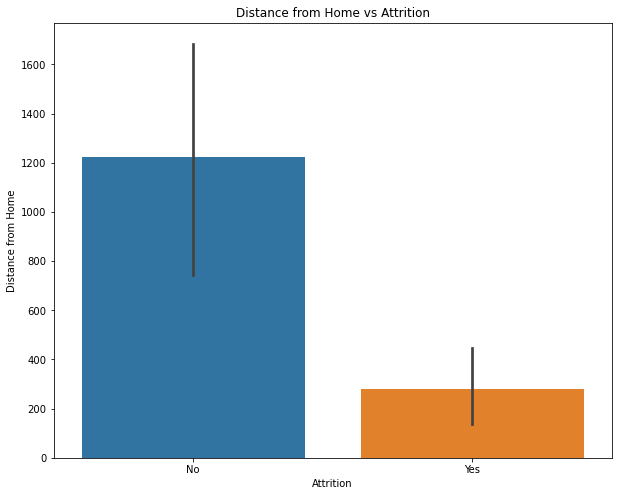

In [12]:
#Plot Distance From Home against Attrition
plt.figure(figsize=(10,8))
sns.barplot(x="Attrition", y="DistanceFromHome", data=JobRole_Distance_Attrition)
plt.title("Distance from Home vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Distance from Home")

In [13]:
# Create cross tabulation between JobRole and Attrition
Crosstab_JobRole_Attrition=pd.crosstab(index=JobRole_Distance_Attrition['JobRole'],columns=JobRole_Distance_Attrition['Attrition'])

Crosstab_JobRole_Attrition

Attrition,No,Yes
JobRole,,
Healthcare Representative,1,1
Human Resources,1,1
Laboratory Technician,1,1
Manager,1,1
Manufacturing Director,1,1
Research Director,1,1
Research Scientist,1,1
Sales Executive,1,1
Sales Representative,1,1


Text(0, 0.5, 'Attrition')

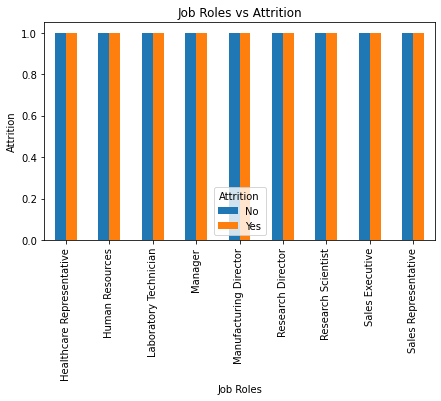

In [14]:
#Plot Job Roles against Attrition
Crosstab_JobRole_Attrition.plot.bar(figsize=(7,4))
plt.title("Job Roles vs Attrition")
plt.xlabel("Job Roles")
plt.ylabel("Attrition")

#### Compare average monthly income by education and attrition

Text(0, 0.5, 'Education')

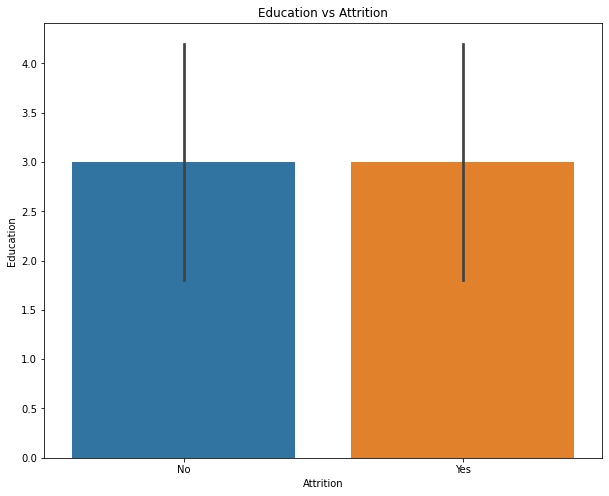

In [15]:
#Plot Education against Attrition
plt.figure(figsize=(10,8))
sns.barplot(x="Attrition", y="Education", data=Education_Income_Attrition )

plt.title("Education vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Education")

Text(0, 0.5, 'Monthly Income')

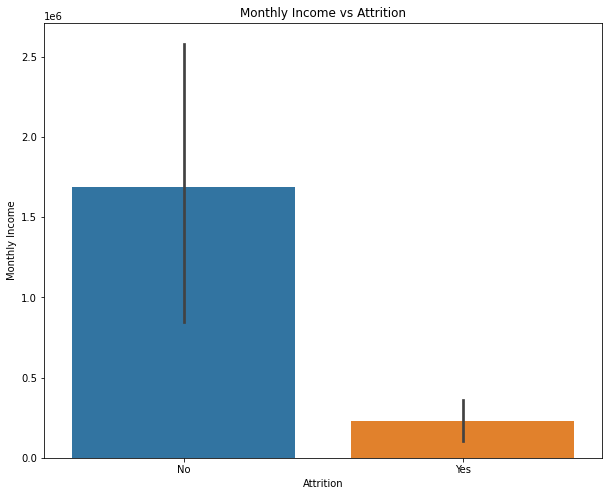

In [16]:
#Plot average Monthly Income against Attrition
plt.figure(figsize=(10,8))
sns.barplot(x="Attrition", y="MonthlyIncome", data=Education_Income_Attrition)
plt.title("Monthly Income vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")